## ADS 245 Project - Titanic Data

### Name: WeiTing Huang                           
### SJSU ID: 014550315

### Import library

In [1]:
# first, import calculation, visualization library
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

## 1. Exploratory Data Analysis

In [2]:
train = pd.read_csv('titanic_train.csv')
test = pd.read_csv('titanic_test.csv')
# survived is the target feature 

In [3]:
train.isnull().sum()
# Check if there is any null column in the dataset
# three columns have missing value: Age, Cabin, Embarked

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
test.isnull().sum()
# three columns have missing value: Age, Cabin, Fare

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


### 1.1 Target feature

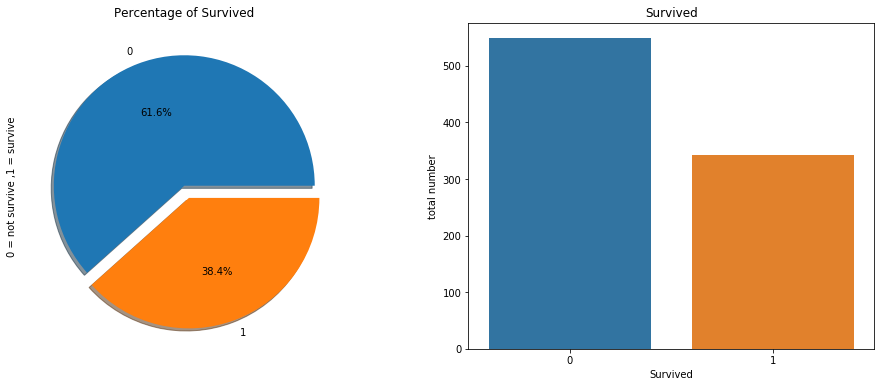

In [9]:
# Target variable for this dataset is Survived. Let's check if there is any inforamtion inside the survived.

f,ax=plt.subplots(1,2,figsize=(16,6))

train['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Percentage of Survived')
ax[0].set_ylabel('0 = not survive ,1 = survive')
sns.countplot('Survived',data=train,ax=ax[1])
ax[1].set_title('Survived')
ax[1].set_ylabel('total number')
plt.show()


From total 891 passengers in training set, around 350 survived.
As the pie chart showed, Only 38.4% of the total training set survived after the crash. 

### 1.2 Feature Engineering

In [10]:
# analysis & data cleaning on this field first
# combine train and test to a dataset which will be easier to motify
ds = pd.concat([train, test] , sort=False)

### 1.2.1 PClass

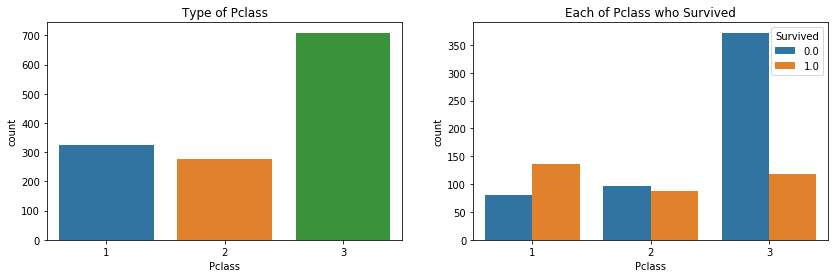

In [11]:
f,ax = plt.subplots(1,2,figsize=(14,4))

sns.countplot('Pclass',data=ds,ax=ax[0])
ax[0].set_title('Type of Pclass')
ax[0].set_ylabel('count')

sns.countplot('Pclass',hue ='Survived',data=ds,ax=ax[1])
ax[1].set_title('Each of Pclass who Survived')
ax[1].set_ylabel('count')
plt.show()

We can see that Passenegers Of Pclass 1 have higher chance to secure. 
Although the the number of passengers in Pclass 3 were higher, the number of survival from Pclass 3 is low.

### 1.2.2 Sex

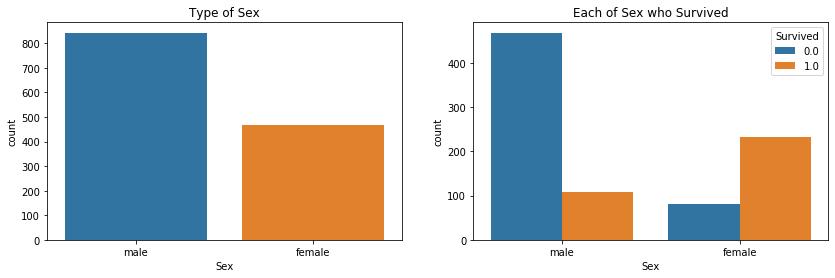

In [12]:
f,ax = plt.subplots(1,2,figsize=(14,4))

sns.countplot('Sex',data=ds,ax=ax[0])
ax[0].set_title('Type of Sex')
ax[0].set_ylabel('count')

sns.countplot('Sex',hue ='Survived',data=ds,ax=ax[1])
ax[1].set_title('Each of Sex who Survived')
ax[1].set_ylabel('count')
plt.show()

Sex is a categorical Feature with two type( male/female). We can found that female survived is higher than male.
Lets dive in to check survival rate with Pclass and sex together.

### 1.2.3 PClass and Sex

In [13]:
ds.loc[:,'Pclass1and2Female'] = 0
ds.loc[:,'Pcalss3Male'] = 0

ds.loc[(ds['Pclass']<=2) & (ds['Sex']=='female'), 'Pclass1and2Female'] = 1
ds.loc[(ds['Pclass']==3) & (ds['Sex']=='male'), 'Pcalss3Male'] = 1

Create two new column to mark female who in Pclass 1 & 2, who are indicate rich women. Also, mark make who in Pcalss 3, who refer to poor men.

### 1.2.4 Name

In [14]:
ds['LastName'] = ds['Name'].str.split(',', expand=True)[0]

In [15]:
sur = []
died = []
for index, row in ds.iterrows():
    s = ds[(ds['LastName']==row['LastName']) & (ds['Survived']==1)]
    d = ds[(ds['LastName']==row['LastName']) & (ds['Survived']==0)]
    s=len(s)
    if row['Survived'] == 1:
        s-=1
    d=len(d)
    if row['Survived'] == 0:
        d-=1
    sur.append(s)
    died.append(d)
    
ds['FamilySurvived'] = sur
ds['FamilyDied'] = died

In [16]:
# mapping family died to 4 bins
ds.loc[ ds['FamilyDied'] == 0, 'FamilyDied'] = 0
ds.loc[(ds['FamilyDied'] > 0) & (ds['FamilyDied'] <= 2), 'FamilyDied'] = 1
ds.loc[(ds['FamilyDied'] > 2) & (ds['FamilyDied'] <= 5), 'FamilyDied'] = 2
ds.loc[(ds['FamilyDied'] > 5), 'FamilyDied'] = 3

Use last name of name to check whether passanger in their family have survived.

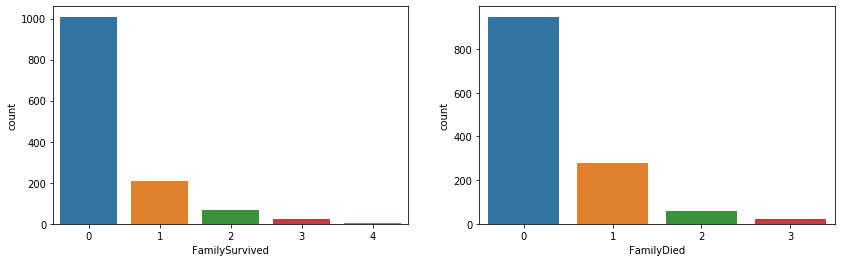

In [17]:
f,ax = plt.subplots(1,2,figsize=(14,4))
sns.countplot('FamilySurvived',data=ds,ax=ax[0])
sns.countplot('FamilyDied',data=ds,ax=ax[1])
plt.show()

### 1.2.5 Embarked

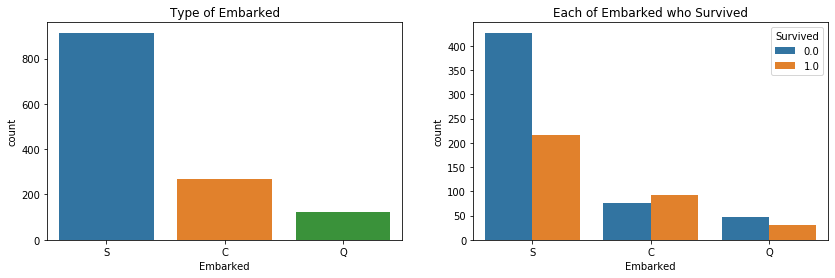

In [18]:
f,ax = plt.subplots(1,2,figsize=(14,4))

sns.countplot('Embarked',data=ds,ax=ax[0])
ax[0].set_title('Type of Embarked')
ax[0].set_ylabel('count')

sns.countplot('Embarked',hue ='Survived',data=ds,ax=ax[1])
ax[1].set_title('Each of Embarked who Survived')
ax[1].set_ylabel('count')
plt.show()

In [19]:
ds['Embarked'] = ds['Embarked'].fillna('S')

We can see that the most common embarded type is S. Becasue there are 2 missing data in Embarded feature, we will just fill the most common one which is S type.

### 1.2.6 Fare

In [20]:
#There is only one missing data in Fare, so fill it as a median vlaue
ds['Fare'] = ds['Fare'].fillna(train['Fare'].median())

In [21]:
print('Max of Fare',ds['Fare'].max())
print('Min of Fare',ds['Fare'].min())
print('Mean of Fare',ds['Fare'].mean())
print('Mode of Fare',ds['Fare'].mode())
print('Standard diviation of Fare',ds['Fare'].std())

Max of Fare 512.3292
Min of Fare 0.0
Mean of Fare 33.28108563789156
Mode of Fare 0    8.05
dtype: float64
Standard diviation of Fare 51.74149976752607


Text(0.5, 1.0, 'Fare values original data')

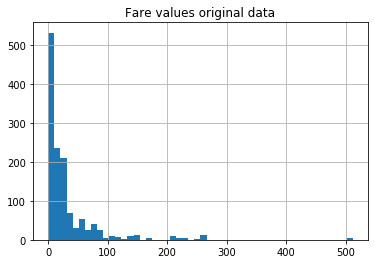

In [22]:
ds['Fare'].astype(int).hist(bins=50).set_title('Fare values original data')

By hist graph, Fare featrue is a left skew distribution. Fare is also a continous feature that need to convert it into ordinal value.We use pandas qcut to splits to 4 bins.

In [23]:
ds['Fare_bin']=pd.qcut(ds['Fare'],4)
ds.groupby(['Fare_bin'])['Survived'].mean().to_frame()

,Survived
Fare_bin,
"(-0.001, 7.896]",0.197309
"(7.896, 14.454]",0.303571
"(14.454, 31.275]",0.441048
"(31.275, 512.329]",0.600000


In [24]:
# Mapping Fare to fare_bin
ds.loc[(ds['Fare'] <= 7.8), 'Fare'] = 0
ds.loc[(ds['Fare'] > 7.8) & (ds['Fare'] <= 14.454), 'Fare'] = 1
ds.loc[(ds['Fare'] > 14.454) & (ds['Fare'] <= 31.27), 'Fare']   = 2
ds.loc[(ds['Fare'] > 31.27), 'Fare'] = 3
#ds['Fare'] = ds['Fare'].astype(int)

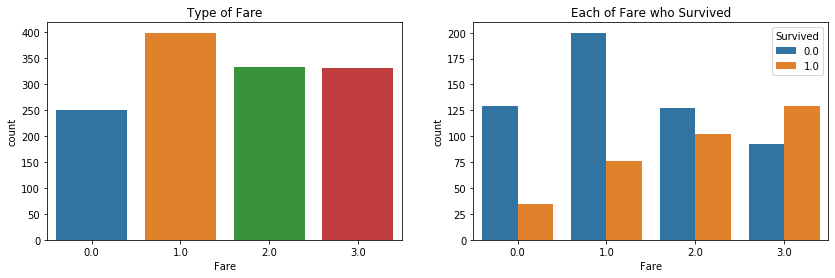

In [25]:
f,ax = plt.subplots(1,2,figsize=(14,4))

sns.countplot('Fare',data=ds,ax=ax[0])
ax[0].set_title('Type of Fare')
ax[0].set_ylabel('count')

sns.countplot('Fare',hue ='Survived',data=ds,ax=ax[1])
ax[1].set_title('Each of Fare who Survived')
ax[1].set_ylabel('count')
plt.show()

### 1.2.7 Age

In [26]:
print('Age of oldest Passenger:',ds['Age'].max())
print('Age of youngest Pasenger',ds['Age'].min())

Age of oldest Passenger: 80.0
Age of youngest Pasenger 0.17


Text(0.5, 1.0, 'Age values original data')

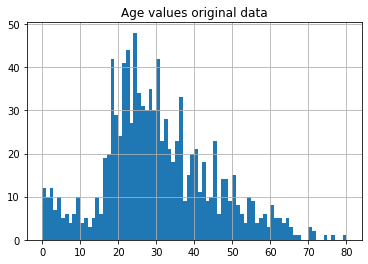

In [27]:
f = ds['Age'].dropna().astype(int).hist(bins=80)
f.set_title('Age values original data')

As we had seen earlier, Age feature has 177(train)+ 86(test) null values. 
To replace these NaN values, we need to observe age of max/min/mean to understand the range of age.
From the histrogrm graph, we can assume age feature is normal distribution.
Then, we can assgin the random value in within +1/-1 segma range. 
Becasue age is a continous feature, we need to use binning to catergrize. 

In [28]:
# fill random vlaue between +1/-1 segma range. 
age_avg = ds['Age'].mean()
age_std = ds['Age'].std()
age_null = ds['Age'].isnull().sum()
age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size= age_null)

In [29]:
ds.loc[np.isnan(ds['Age']),'Age'] = age_null_random_list
ds.loc[:,'Age'] = ds['Age'].astype(int)

# Threshold of each bins : (80-0)/5 = 16
# Mapping Age
ds.loc[ ds['Age'] <= 16, 'Age'] = 0
ds.loc[(ds['Age'] > 16) & (ds['Age'] <= 32), 'Age'] = 1
ds.loc[(ds['Age'] > 32) & (ds['Age'] <= 48), 'Age'] = 2
ds.loc[(ds['Age'] > 48) & (ds['Age'] <= 64), 'Age'] = 3
ds.loc[ ds['Age'] > 64, 'Age'] = 4

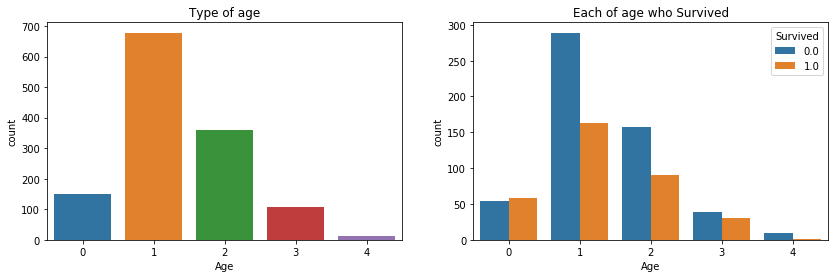

In [30]:
f,ax = plt.subplots(1,2,figsize=(14,4))

sns.countplot('Age',data=ds,ax=ax[0])
ax[0].set_title('Type of age')
ax[0].set_ylabel('count')

sns.countplot('Age',hue ='Survived',data=ds,ax=ax[1])
ax[1].set_title('Each of age who Survived')
ax[1].set_ylabel('count')
plt.show()

### 1.2.8 Cabin

In [31]:
ds.loc[:,'Cabin'] = pd.Series([1 if not pd.isnull(i) else 0 for i in ds['Cabin']]) 

Since there are more than 60% of Cabin featrue is missing, we can't fill values by reference other. I will only mark people who have cabin in this trip.

### 1.2.9 SibSp and Parch

Create new columns called "Family_size" and "Alone".
By calculate Parch and SibSp columns, we can know family size of the passengers.

In [32]:
ds['FamilySize'] = ds['SibSp'] + ds['Parch'] + 1
ds['IsAlone'] = 0
ds.loc[ds['FamilySize'] == 1, 'IsAlone'] = 1

In [33]:
print('Max of family size',ds['FamilySize'].max())
print('Min of family size',ds['FamilySize'].min())

Max of family size 11
Min of family size 1


In [34]:
# binning of family size, use 5 bins
# (11-1) / 5 = 2. 
ds.loc[ ds['FamilySize'] <= 3, 'FamilySize'] = 0
ds.loc[(ds['FamilySize'] > 3) & (ds['FamilySize'] <= 5), 'FamilySize'] = 1
ds.loc[(ds['FamilySize'] > 5) & (ds['FamilySize'] <= 7), 'FamilySize'] = 2
ds.loc[(ds['FamilySize'] > 7) & (ds['FamilySize'] <= 9), 'FamilySize'] = 3
ds.loc[ ds['FamilySize'] > 9, 'FamilySize'] = 4

Text(0.5, 1.0, 'Type of age')

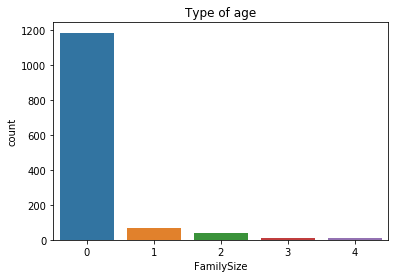

In [35]:
sns.countplot('FamilySize',data=ds).set_title('Type of age')

In [36]:
ds.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Pclass1and2Female,Pcalss3Male,LastName,FamilySurvived,FamilyDied,Fare_bin,FamilySize,IsAlone
0,1,0.0,3,"Braund, Mr. Owen Harris",male,1,1,0,A/5 21171,0.0,0,S,0,1,Braund,0,1,"(-0.001, 7.896]",0,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,2,1,0,PC 17599,3.0,1,C,1,0,Cumings,0,0,"(31.275, 512.329]",0,0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,1,0,0,STON/O2. 3101282,1.0,0,S,0,0,Heikkinen,0,0,"(7.896, 14.454]",0,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,2,1,0,113803,3.0,1,S,1,0,Futrelle,0,1,"(31.275, 512.329]",0,0
4,5,0.0,3,"Allen, Mr. William Henry",male,2,0,0,373450,1.0,0,S,0,1,Allen,1,0,"(7.896, 14.454]",0,1


### 1.3 One hot Encoding - Categorical data

In [37]:
categorical = ['Pclass', 'Sex', 'Embarked', 'Age', 'Fare','FamilySize','FamilySurvived','FamilyDied']
for c in categorical:
    ds = pd.concat([ds, pd.get_dummies(ds[c], prefix=c)], axis=1)
    ds = ds.drop([c], axis=1)

In [38]:
ds = ds.drop(['PassengerId', 'Ticket', 'LastName', 'SibSp', 'Parch','Name','Fare_bin','Sex_male'], axis=1)

In [39]:
train = ds[ds['Survived'].notnull()]
test = ds[ds['Survived'].isnull()]
test = test.drop(['Survived'], axis=1)

In [40]:
train.head()

,Survived,Cabin,Pclass1and2Female,Pcalss3Male,IsAlone,Pclass_1,Pclass_2,Pclass_3,Sex_female,Embarked_C,...,FamilySize_4,FamilySurvived_0,FamilySurvived_1,FamilySurvived_2,FamilySurvived_3,FamilySurvived_4,FamilyDied_0,FamilyDied_1,FamilyDied_2,FamilyDied_3
0,0.0,0,0,1,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,1.0,1,1,0,0,1,0,0,1,1,...,0,1,0,0,0,0,1,0,0,0
2,1.0,0,0,0,1,0,0,1,1,0,...,0,1,0,0,0,0,1,0,0,0
3,1.0,1,1,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
4,0.0,0,0,1,1,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0


In [41]:
test.head()

,Cabin,Pclass1and2Female,Pcalss3Male,IsAlone,Pclass_1,Pclass_2,Pclass_3,Sex_female,Embarked_C,Embarked_Q,...,FamilySize_4,FamilySurvived_0,FamilySurvived_1,FamilySurvived_2,FamilySurvived_3,FamilySurvived_4,FamilyDied_0,FamilyDied_1,FamilyDied_2,FamilyDied_3
0,0,0,1,1,0,0,1,0,0,1,...,0,0,0,0,1,0,0,1,0,0
1,1,0,0,0,0,0,1,1,0,0,...,0,1,0,0,0,0,1,0,0,0
2,0,0,0,1,0,1,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0
3,1,0,1,1,0,0,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,1,1,0,0,...,0,0,1,0,0,0,1,0,0,0


In [42]:
train.to_csv('train.csv')
test.to_csv('test.csv')
#load to csv file to double check the data.

### 1.4 Create a sub-test group to test accuracy rate

In [43]:
X_train = np.array(train.iloc[:800,1:])
y_train = np.array(train.iloc[:800,0])

In [44]:
X_test = np.array(train.iloc[800:,1:])
y_test = np.array(train.iloc[800:,0])

In [45]:
submit_test = np.array(test) 

##  2. KNN model

### 2.1 Create KNN class

In [46]:
class KNearestNeighbor(object):
    
    def __init__(self):
        pass
    def train(self, X, y):
        self.X_train = X
        self.y_train = y
        
    #predict compute distances and predict labels
    def predict(self, X, k=1):
        dists = self.compute_distances(X)
        return self.predict_labels(dists, k=k)
    
    def compute_distances(self, X):
        num_test = X.shape[0]
        num_train = self.X_train.shape[0]
        dists = np.zeros((num_test, num_train))
        dists = np.sqrt(np.sum(X**2, axis=1).reshape(num_test, 1) + np.sum(self.X_train**2, axis=1) - 2 * X.dot(self.X_train.T))
        return dists
    
    def predict_labels(self, dists, k=1):
        num_test = dists.shape[0]
        y_pred = np.zeros(num_test)
        for i in range(num_test):
            closest_y = []
            top_k_indx = np.argsort(dists[i])[:k]
            closest_y = self.y_train[top_k_indx]
            vote = Counter(closest_y)
            count = vote.most_common()
            y_pred[i] = count[0][0]
        return y_pred

### 2.2 Test KNN model

In [71]:
classifier = KNearestNeighbor()

In [72]:
classifier.train(X_train, y_train)

In [73]:
dists = classifier.compute_distances(X_test)

In [74]:
y_test_pred = classifier.predict_labels(dists, k=5)
# try accuacy rate here, and came out k = 5 has best result

In [75]:
num_test = y_test.shape[0]
num_correct = np.sum(y_test_pred == y_test)
accuracy = float(num_correct) / num_test
print('Got %d / %d correct => accuracy: %f' % (num_correct, num_test, accuracy))

Got 74 / 91 correct => accuracy: 0.813187


### 2.3 Predict test dataset 

In [76]:
classifier_submit = KNearestNeighbor()

In [77]:
classifier_submit.train(np.array(train.iloc[:,1:]), np.array(train.iloc[:,0]))

In [78]:
dists = classifier_submit.compute_distances(submit_test)

In [79]:
y_submit_pred = classifier_submit.predict_labels(dists, k=5)

In [80]:
passengerid = pd.read_csv('gender_submission.csv')

In [81]:
y_submit = pd.DataFrame(data=y_submit_pred, columns=['Survived'])

In [82]:
df = [passengerid['PassengerId'], y_submit]
result = pd.concat(df,axis=1)
result.to_csv('submisson.csv', index=False)

## 3. Logistic Regression

### 3.1 Create LR class

In [59]:
class LogisticRegression(object):
    
    def __init__(self):
        pass
    def train(self,X,y):
        self.X_train = X
        self.y_train = y
        
    def sigmoid(self,z):
        s = 1/(1+np.exp(-z))
        return s
    
    def initilialize_with_zeros(self,dim):
        w = np.zeros((dim,1))
        b = 0
        return w,b
    
    def propagate(self,w,b):
        # Forward Propagation
        m = self.X_train.shape[1]
        A = self.sigmoid(np.dot(w.T,self.X_train.T) + b)
        cost = (-1/m)*(np.sum(self.y_train*np.log(A) + (1-self.y_train)*np.log(1-A)))
        
        # Backward Propagation
        dw = 1/m*(np.dot(self.X_train.T, (A-self.y_train).T))
        db = 1/m*np.sum(A-self.y_train)
        
        grads = {'dw':dw, 'db':db}
        return grads, cost
    
    def optimize(self,w,b,num_iter, learning_rate, print_cost=False):
        costs = []
        for i in range(num_iter):
            grads, cost = self.propagate(w,b)
            dw = grads['dw']
            db = grads['db']
            
            w = w - dw * learning_rate
            b = b - db * learning_rate
            
            if i % 100 == 0:
                costs.append(cost)
            if print_cost and i % 100 == 0:
                print('Cost after iteration %i: %f' %(i,cost))
            
        params = {'w':w,'b':b}
        grads = {'dw':dw,'db':db}
        
        return params, grads, costs
    
    def predict(self,w,b,X):
        m = X.shape[0]
        Y_prediction = np.zeros((1,m))
        w = w.reshape(X.shape[1],1)
        A = self.sigmoid(np.dot(w.T,X.T)+b)
        
        for i in range(A.shape[1]):
            if A[0,i] > 0.5:
                Y_prediction[0,i] = 1
            else:
                Y_prediction[0,i] = 0
            
        return Y_prediction
    
    def model(self, X_test = None, y_test = None, num_iterations = 100000, learning_rate = 0.005, print_cost = False):
        w, b = self.initilialize_with_zeros(self.X_train.shape[1])
        parameters, grads, costs = self.optimize(w, b, num_iterations, learning_rate, print_cost)
        w = parameters["w"]
        b = parameters["b"]
        Y_prediction_test = self.predict(w, b, X_test)
        Y_prediction_train = self.predict(w, b, self.X_train)
        print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - self.y_train)) * 100))
        if y_test is not None:
            print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - y_test)) * 100))
        
        d = {"costs": costs,
        "Y_prediction_test": Y_prediction_test, 
        "Y_prediction_train" : Y_prediction_train, 
        "w" : w, 
        "b" : b,
        "learning_rate" : learning_rate,
        "num_iterations": num_iterations}
        
        return d

### 3.2 Test LR model

In [60]:
classifier = LogisticRegression()

In [61]:
classifier.train(np.array(train.iloc[:800,1:]), np.array(train.iloc[:800,0]))

In [62]:
d = classifier.model(np.array(train.iloc[800:,1:]), np.array(train.iloc[800:,0]),print_cost = True)

Cost after iteration 0: 16.309345
Cost after iteration 100: 11.034436
Cost after iteration 200: 10.339330
Cost after iteration 300: 10.041449
Cost after iteration 400: 9.873417
Cost after iteration 500: 9.764445
Cost after iteration 600: 9.687930
Cost after iteration 700: 9.631506
Cost after iteration 800: 9.588497
Cost after iteration 900: 9.554913
Cost after iteration 1000: 9.528192
Cost after iteration 1100: 9.506606
Cost after iteration 1200: 9.488943
Cost after iteration 1300: 9.474330
Cost after iteration 1400: 9.462120
Cost after iteration 1500: 9.451829
Cost after iteration 1600: 9.443086
Cost after iteration 1700: 9.435603
Cost after iteration 1800: 9.429155
Cost after iteration 1900: 9.423563
Cost after iteration 2000: 9.418685
Cost after iteration 2100: 9.414406
Cost after iteration 2200: 9.410631
Cost after iteration 2300: 9.407286
Cost after iteration 2400: 9.404306
Cost after iteration 2500: 9.401639
Cost after iteration 2600: 9.399242
Cost after iteration 2700: 9.397080


Cost after iteration 24100: 9.357033
Cost after iteration 24200: 9.357005
Cost after iteration 24300: 9.356977
Cost after iteration 24400: 9.356949
Cost after iteration 24500: 9.356921
Cost after iteration 24600: 9.356894
Cost after iteration 24700: 9.356867
Cost after iteration 24800: 9.356839
Cost after iteration 24900: 9.356812
Cost after iteration 25000: 9.356785
Cost after iteration 25100: 9.356759
Cost after iteration 25200: 9.356732
Cost after iteration 25300: 9.356706
Cost after iteration 25400: 9.356680
Cost after iteration 25500: 9.356653
Cost after iteration 25600: 9.356627
Cost after iteration 25700: 9.356602
Cost after iteration 25800: 9.356576
Cost after iteration 25900: 9.356550
Cost after iteration 26000: 9.356525
Cost after iteration 26100: 9.356500
Cost after iteration 26200: 9.356474
Cost after iteration 26300: 9.356449
Cost after iteration 26400: 9.356425
Cost after iteration 26500: 9.356400
Cost after iteration 26600: 9.356375
Cost after iteration 26700: 9.356351
C

Cost after iteration 47400: 9.353063
Cost after iteration 47500: 9.353053
Cost after iteration 47600: 9.353043
Cost after iteration 47700: 9.353032
Cost after iteration 47800: 9.353022
Cost after iteration 47900: 9.353012
Cost after iteration 48000: 9.353002
Cost after iteration 48100: 9.352992
Cost after iteration 48200: 9.352981
Cost after iteration 48300: 9.352971
Cost after iteration 48400: 9.352961
Cost after iteration 48500: 9.352951
Cost after iteration 48600: 9.352941
Cost after iteration 48700: 9.352931
Cost after iteration 48800: 9.352922
Cost after iteration 48900: 9.352912
Cost after iteration 49000: 9.352902
Cost after iteration 49100: 9.352892
Cost after iteration 49200: 9.352882
Cost after iteration 49300: 9.352872
Cost after iteration 49400: 9.352863
Cost after iteration 49500: 9.352853
Cost after iteration 49600: 9.352843
Cost after iteration 49700: 9.352834
Cost after iteration 49800: 9.352824
Cost after iteration 49900: 9.352815
Cost after iteration 50000: 9.352805
C

Cost after iteration 69900: 9.351368
Cost after iteration 70000: 9.351363
Cost after iteration 70100: 9.351357
Cost after iteration 70200: 9.351352
Cost after iteration 70300: 9.351347
Cost after iteration 70400: 9.351341
Cost after iteration 70500: 9.351336
Cost after iteration 70600: 9.351330
Cost after iteration 70700: 9.351325
Cost after iteration 70800: 9.351320
Cost after iteration 70900: 9.351314
Cost after iteration 71000: 9.351309
Cost after iteration 71100: 9.351304
Cost after iteration 71200: 9.351298
Cost after iteration 71300: 9.351293
Cost after iteration 71400: 9.351288
Cost after iteration 71500: 9.351282
Cost after iteration 71600: 9.351277
Cost after iteration 71700: 9.351272
Cost after iteration 71800: 9.351267
Cost after iteration 71900: 9.351261
Cost after iteration 72000: 9.351256
Cost after iteration 72100: 9.351251
Cost after iteration 72200: 9.351246
Cost after iteration 72300: 9.351240
Cost after iteration 72400: 9.351235
Cost after iteration 72500: 9.351230
C

Cost after iteration 92100: 9.350407
Cost after iteration 92200: 9.350404
Cost after iteration 92300: 9.350400
Cost after iteration 92400: 9.350397
Cost after iteration 92500: 9.350393
Cost after iteration 92600: 9.350390
Cost after iteration 92700: 9.350387
Cost after iteration 92800: 9.350383
Cost after iteration 92900: 9.350380
Cost after iteration 93000: 9.350376
Cost after iteration 93100: 9.350373
Cost after iteration 93200: 9.350370
Cost after iteration 93300: 9.350366
Cost after iteration 93400: 9.350363
Cost after iteration 93500: 9.350360
Cost after iteration 93600: 9.350356
Cost after iteration 93700: 9.350353
Cost after iteration 93800: 9.350350
Cost after iteration 93900: 9.350346
Cost after iteration 94000: 9.350343
Cost after iteration 94100: 9.350340
Cost after iteration 94200: 9.350336
Cost after iteration 94300: 9.350333
Cost after iteration 94400: 9.350330
Cost after iteration 94500: 9.350327
Cost after iteration 94600: 9.350323
Cost after iteration 94700: 9.350320
C

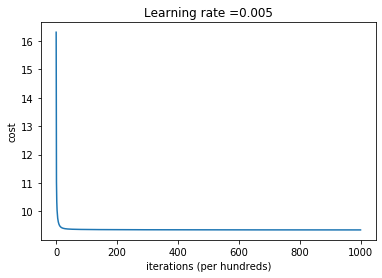

In [63]:
# Plot learning curve (with costs)
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()

### 3.3 Predict test dataset

In [83]:
classifier_submission = LogisticRegression()

In [84]:
classifier_submission.train(np.array(train.iloc[:,1:]), np.array(train.iloc[:,0]))

In [85]:
d = classifier_submission.model(submit_test, print_cost = True)

Cost after iteration 0: 18.164533
Cost after iteration 100: 12.080498
Cost after iteration 200: 11.357918
Cost after iteration 300: 11.047084
Cost after iteration 400: 10.870443
Cost after iteration 500: 10.755401
Cost after iteration 600: 10.674538
Cost after iteration 700: 10.614942
Cost after iteration 800: 10.569567
Cost after iteration 900: 10.534173
Cost after iteration 1000: 10.506029
Cost after iteration 1100: 10.483292
Cost after iteration 1200: 10.464671
Cost after iteration 1300: 10.449238
Cost after iteration 1400: 10.436309
Cost after iteration 1500: 10.425372
Cost after iteration 1600: 10.416036
Cost after iteration 1700: 10.408000
Cost after iteration 1800: 10.401029
Cost after iteration 1900: 10.394936
Cost after iteration 2000: 10.389572
Cost after iteration 2100: 10.384820
Cost after iteration 2200: 10.380582
Cost after iteration 2300: 10.376781
Cost after iteration 2400: 10.373350
Cost after iteration 2500: 10.370238
Cost after iteration 2600: 10.367399
Cost after it

Cost after iteration 23300: 10.276576
Cost after iteration 23400: 10.276457
Cost after iteration 23500: 10.276340
Cost after iteration 23600: 10.276224
Cost after iteration 23700: 10.276108
Cost after iteration 23800: 10.275993
Cost after iteration 23900: 10.275880
Cost after iteration 24000: 10.275767
Cost after iteration 24100: 10.275655
Cost after iteration 24200: 10.275543
Cost after iteration 24300: 10.275433
Cost after iteration 24400: 10.275324
Cost after iteration 24500: 10.275215
Cost after iteration 24600: 10.275107
Cost after iteration 24700: 10.275000
Cost after iteration 24800: 10.274894
Cost after iteration 24900: 10.274788
Cost after iteration 25000: 10.274683
Cost after iteration 25100: 10.274579
Cost after iteration 25200: 10.274476
Cost after iteration 25300: 10.274374
Cost after iteration 25400: 10.274272
Cost after iteration 25500: 10.274171
Cost after iteration 25600: 10.274071
Cost after iteration 25700: 10.273972
Cost after iteration 25800: 10.273873
Cost after i

Cost after iteration 46300: 10.262705
Cost after iteration 46400: 10.262676
Cost after iteration 46500: 10.262647
Cost after iteration 46600: 10.262618
Cost after iteration 46700: 10.262589
Cost after iteration 46800: 10.262560
Cost after iteration 46900: 10.262532
Cost after iteration 47000: 10.262504
Cost after iteration 47100: 10.262475
Cost after iteration 47200: 10.262447
Cost after iteration 47300: 10.262419
Cost after iteration 47400: 10.262391
Cost after iteration 47500: 10.262364
Cost after iteration 47600: 10.262336
Cost after iteration 47700: 10.262309
Cost after iteration 47800: 10.262281
Cost after iteration 47900: 10.262254
Cost after iteration 48000: 10.262227
Cost after iteration 48100: 10.262200
Cost after iteration 48200: 10.262173
Cost after iteration 48300: 10.262146
Cost after iteration 48400: 10.262120
Cost after iteration 48500: 10.262093
Cost after iteration 48600: 10.262067
Cost after iteration 48700: 10.262041
Cost after iteration 48800: 10.262015
Cost after i

Cost after iteration 68300: 10.258491
Cost after iteration 68400: 10.258478
Cost after iteration 68500: 10.258466
Cost after iteration 68600: 10.258453
Cost after iteration 68700: 10.258441
Cost after iteration 68800: 10.258429
Cost after iteration 68900: 10.258416
Cost after iteration 69000: 10.258404
Cost after iteration 69100: 10.258392
Cost after iteration 69200: 10.258380
Cost after iteration 69300: 10.258368
Cost after iteration 69400: 10.258356
Cost after iteration 69500: 10.258344
Cost after iteration 69600: 10.258332
Cost after iteration 69700: 10.258320
Cost after iteration 69800: 10.258308
Cost after iteration 69900: 10.258296
Cost after iteration 70000: 10.258284
Cost after iteration 70100: 10.258272
Cost after iteration 70200: 10.258261
Cost after iteration 70300: 10.258249
Cost after iteration 70400: 10.258237
Cost after iteration 70500: 10.258226
Cost after iteration 70600: 10.258214
Cost after iteration 70700: 10.258202
Cost after iteration 70800: 10.258191
Cost after i

Cost after iteration 90800: 10.256432
Cost after iteration 90900: 10.256425
Cost after iteration 91000: 10.256419
Cost after iteration 91100: 10.256412
Cost after iteration 91200: 10.256405
Cost after iteration 91300: 10.256399
Cost after iteration 91400: 10.256392
Cost after iteration 91500: 10.256385
Cost after iteration 91600: 10.256379
Cost after iteration 91700: 10.256372
Cost after iteration 91800: 10.256366
Cost after iteration 91900: 10.256359
Cost after iteration 92000: 10.256353
Cost after iteration 92100: 10.256346
Cost after iteration 92200: 10.256340
Cost after iteration 92300: 10.256333
Cost after iteration 92400: 10.256327
Cost after iteration 92500: 10.256320
Cost after iteration 92600: 10.256314
Cost after iteration 92700: 10.256307
Cost after iteration 92800: 10.256301
Cost after iteration 92900: 10.256295
Cost after iteration 93000: 10.256288
Cost after iteration 93100: 10.256282
Cost after iteration 93200: 10.256276
Cost after iteration 93300: 10.256269
Cost after i

In [86]:
df = [passengerid['PassengerId'], pd.DataFrame(data=d["Y_prediction_test"].T, columns=['Survived'])]
result = pd.concat(df,axis=1)
result.to_csv('submisson_LR.csv', index=False)

## 4. Submit Kaggle score - 0.787

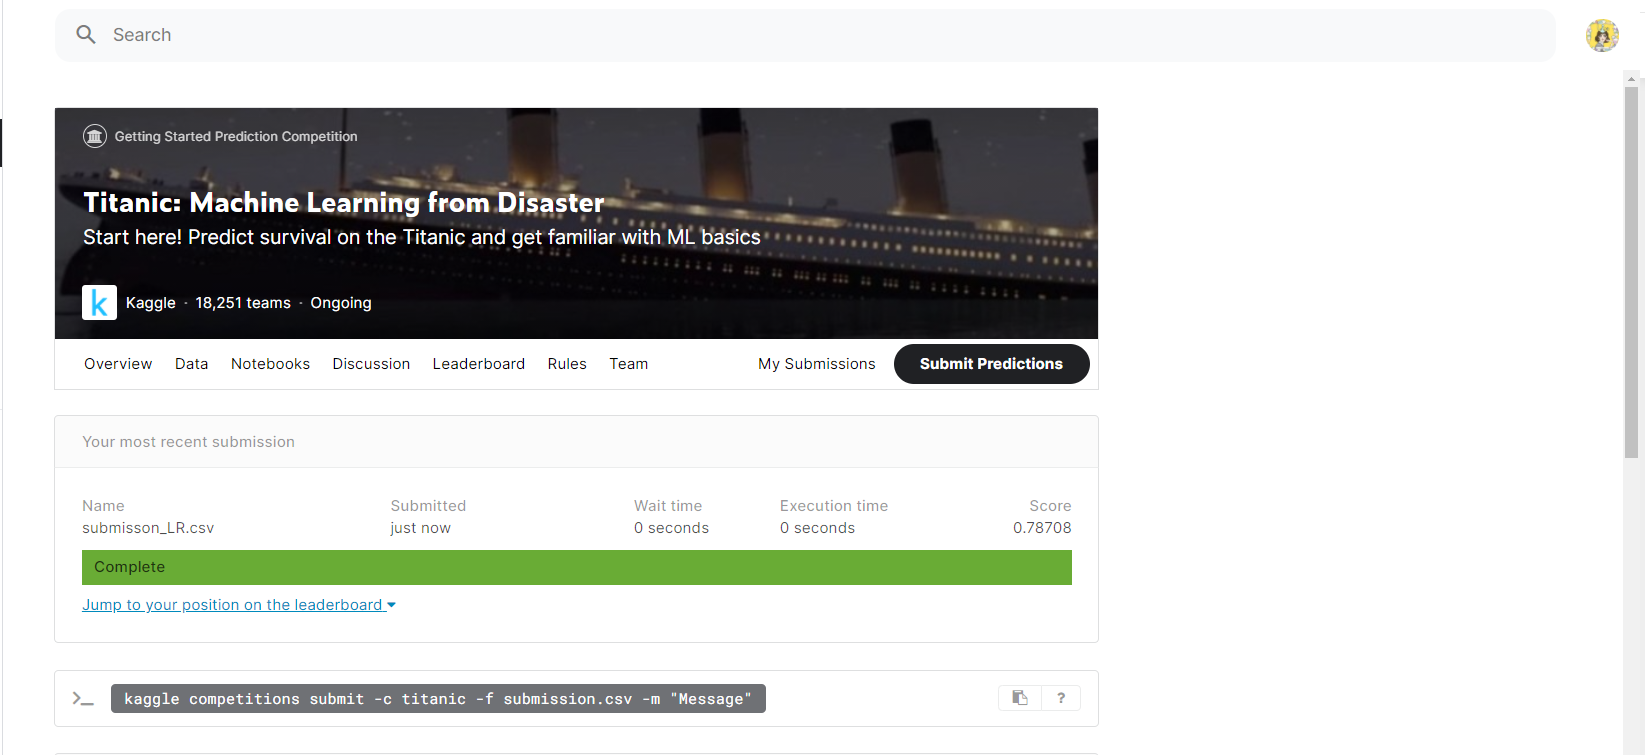

In [68]:
from IPython.display import Image
Image("score.png")

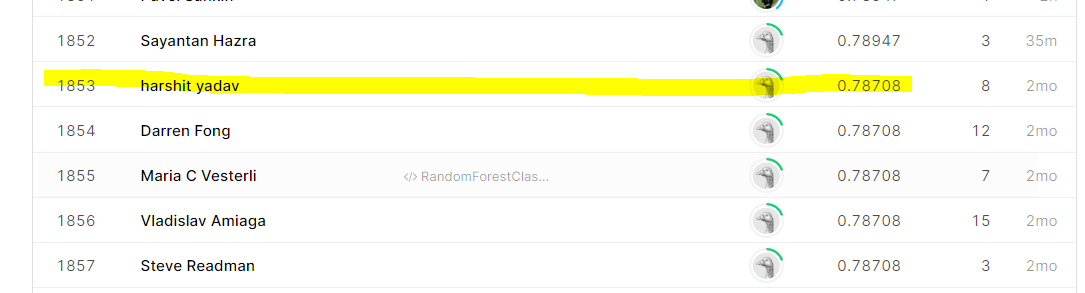

In [87]:
Image("score_2.png")

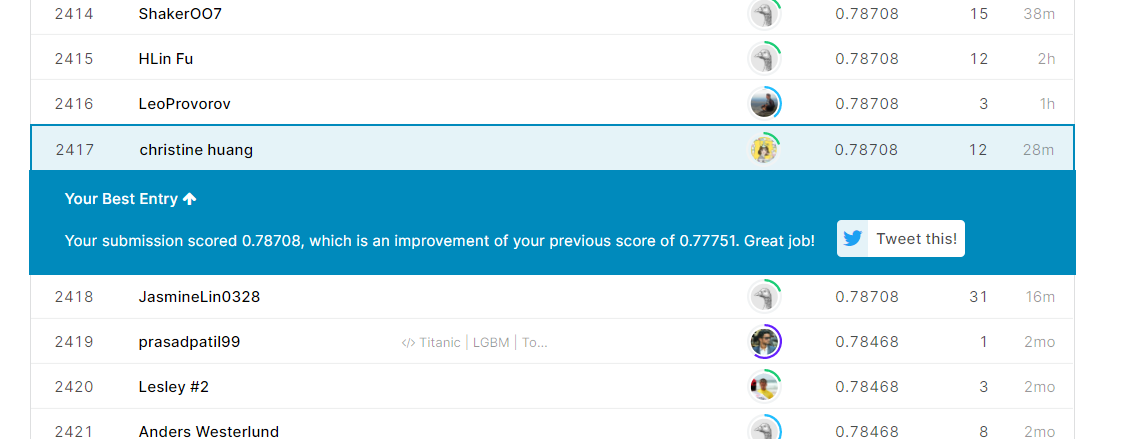

In [88]:
Image("score_3.png")